In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [5]:
from wordcloud import WordCloud

In [7]:
# !pip install --user wordcloud

In [10]:
# load the data 
# flat files: .txt, .csv, .dat, .data, pickle, not extenstion
df = pd.read_csv('SMSSpamCollection',sep='\t',header=None,names=['label','text']) 
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
sample = df['text'][0]
sample

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

- clean
- lemma

In [18]:
import nlp_tools
import re

In [19]:
def clean_text(text):
    text = text.lower() # convert into lowercase
    text = re.sub(r'[^a-z0-9 ]','',text) # remove special characters
    return text

In [22]:
txt = clean_text(sample)

In [23]:
nlp_tools.lemmatization_sentence(txt)

'go until jurong point crazy available only in bugis n great world la e buffet cine there get amore wat'

In [24]:
sample

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [26]:
df['clean_text'] = df['text'].apply(clean_text) # clean the text

In [28]:
# lemmatization
df['clean_text'] = df['clean_text'].apply(nlp_tools.lemmatization_sentence)

In [31]:
corpus = df['clean_text'].to_list() # converting into list of sentence

In [34]:
# wordcloud
comple_text = " ".join(corpus)
cloud = WordCloud(width=1920,height=1080).generate(comple_text)

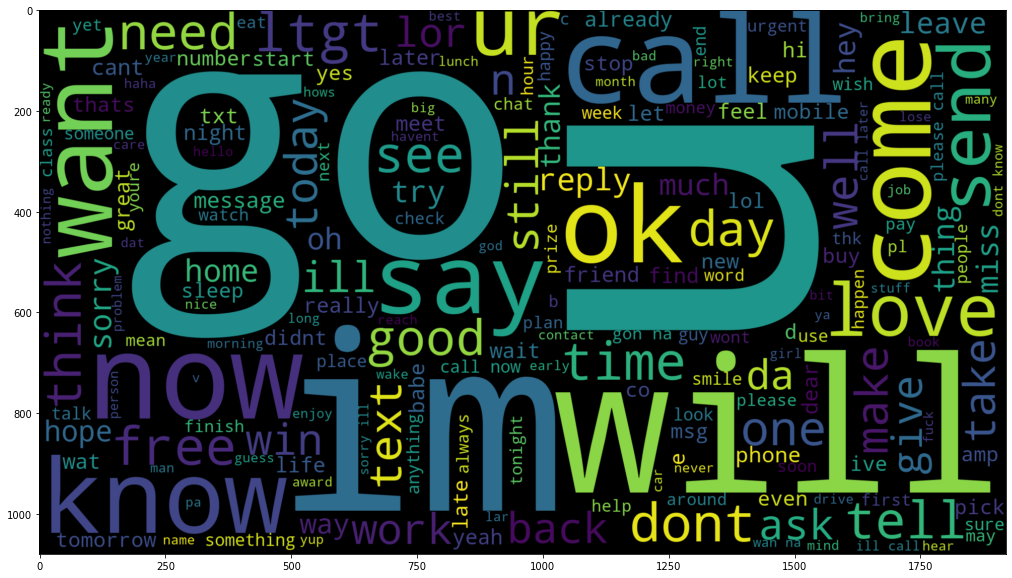

In [36]:
plt.figure(figsize=(20,10))
plt.imshow(cloud,interpolation='bilinear') # interpoltion way of shinking the image (image processing)

# Word Embedding
- Bag of Words

In [38]:
from sklearn.feature_extraction.text import CountVectorizer # Bag of Words

In [39]:
cv = CountVectorizer()

In [41]:
cv.fit(corpus)

CountVectorizer()

In [42]:
X_vec = cv.transform(corpus).toarray()

In [44]:
X_vec.shape

(5572, 8553)

In [48]:
features = cv.get_feature_names()

In [50]:
df_vector = pd.DataFrame(X_vec,columns=features)
df_vector.head(3)

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zebra,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y = df['label'].replace(['ham','spam'],[0,1]).values

In [56]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_vec,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4457, 8553), (1115, 8553), (4457,), (1115,))

### Machine Learning model

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import MultinomialNB

In [59]:
model_nb = MultinomialNB()
model_nb.fit(x_train,y_train)

MultinomialNB()

In [60]:
y_pred = model_nb.predict(x_test)

#### Evaluations

In [61]:
from sklearn import metrics

In [62]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[940,  20],
       [ 10, 145]])

In [64]:
cr = metrics.classification_report(y_test,y_pred,output_dict=True,target_names=['ham','spam'])
pd.DataFrame(cr)

,ham,spam,accuracy,macro avg,weighted avg
precision,0.989474,0.878788,0.973094,0.934131,0.974087
recall,0.979167,0.935484,0.973094,0.957325,0.973094
f1-score,0.984293,0.906250,0.973094,0.945272,0.973444
support,960.000000,155.000000,0.973094,1115.000000,1115.000000


In [65]:
# test 
test1 = 'To Avail, this offer CALL US !!!' # 

In [71]:
# step-1: clean
sample = clean_text(test1)
# step-2: lemma
sample = nlp_tools.lemmatization_sentence(sample)
# step-3: word embedding
x_sample = cv.transform([sample]).toarray()
# step-4: pass to model
res = model_nb.predict(x_sample)
prob = model_nb.predict_proba(x_sample)

In [72]:
res

array([1])

In [73]:
prob

array([[0.14025002, 0.85974998]])

In [75]:
# test 
test1 = 'Can we meet Tomorrow... in the class' # 

In [76]:
# step-1: clean
sample = clean_text(test1)
# step-2: lemma
sample = nlp_tools.lemmatization_sentence(sample)
# step-3: word embedding
x_sample = cv.transform([sample]).toarray()
# step-4: pass to model
res = model_nb.predict(x_sample)
prob = model_nb.predict_proba(x_sample)

In [77]:
res

array([0])

In [78]:
prob

array([[9.99972321e-01, 2.76785455e-05]])